### ML- Algorithm
<a id='h_cell'></a>


|#NO|Algorithm Name| Code|
|--:|:---          |--:|
|01|[K-NN](#k_nn_cell)|[code](./K_NN.py)|
|02|[SVM](#svm_cell)|[code](./svm.py)|
|03|[Linear regression](#lr_cell)|[code](./linear_regression.py)|
|04|[Logistic regression](#lor_cell)|[code](./logistic_regression.py)|
|05|[Navie Bayes](#nb_cell)|[code](./naive-bayes/naive_bayes.py)|
|06|[Decission Tree](#dt_cell)|[code](./decission-tree/decission_tree.py)|

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from K_NN import KNN
from svm import SVM

#### [01 KNN:](#h_cell)

<a id='k_nn_cell'></a>
K-Nearest Neighbors (KNN) is a simple and widely used classification and regression algorithm in machine learning. It is categorized as an instance-based learning or lazy learning algorithm because it doesn't explicitly learn a model during training but instead memorizes the entire training dataset for making predictions.

##### Algorithm:
1. Select the number K of the neighbors
2. Calculate the Euclidean distance of K number of neighbors
3. Take the K nearest neighbors as per the calculated Euclidean distance.
4. Among these k neighbors, count the number of the data points in each category.
5. Assign the new data points to that category for which the number of the neighbor is maximum.

In [9]:
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

k = 7
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("KNN classification accuracy", clf.accuracy(y_test, predictions))

KNN classification accuracy 0.9666666666666667


#### [2. SVM:](#h_cell)
<a id='svm_cell'></a>

<a id='svm_cell'></a>
In machine learning, [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine) (SVMs, also support vector networks[1]) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

<p align="center"><img width="50%" src="../images/svm.png" /></p>

1. Linear Model:
    * $w\cdot x - b=0$
    * $w\cdot x_i - b\geq 1$ if $y_i=1$
    * $w\cdot x_i - b\leq -1$ if $y_i=-1$

Keypoints:
1. Hyperplane: In a two-dimensional space, a hyperplane is a line that separates the two classes. In higher dimensions, it's a generalized flat surface.
2. Margin: The distance between the hyperplane and the nearest data points from each class is called the margin. SVM aims to maximize this margin.
3. Support Vectors: Support vectors are the closest data points to the hyperplane, which makes a critical role in deciding the hyperplane and margin. 

SVM type:
1. Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
2. Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier. 

##### Algorithm: SVM algorithm can be used for Face detection, image classification, text categorization, etc.
1. predicted: $y_i(w\cdot x_i - b)\geq 1$ and $f(x)=w\cdot x - b$
2. calclue the loss(hinge loss) : $l=\max (0,1-y_i(w\cdot x_i -b))$<br>
    $l= \begin{cases} 0 & if\; f(x)\geq 1 \\1-y\cdot f(x) & otherwise\end{cases}$<br>
3. Add Regularization: $j=\displaystyle \lambda \lVert w\rVert^2 + \frac{1}{n}\sum_{i=1}^{n}\max (0,1-y_i(w\cdot x_i -b))$<br>
    * if $y_i\cdot f(x_i)\geq 1:$
        * $j_i= \displaystyle \lambda \lVert w\rVert^2$
    * else:
        * $j_i= \displaystyle \lambda \lVert w\rVert^2+1-y_i(w\cdot x_i -b)$
4. Calculate Gradient:
    * if $y_i\cdot f(x_i)\geq 1:$
        * $\displaystyle \frac{dj_i}{dw_k}=  2\lambda w_k$
        * $\displaystyle \frac{dj_i}{db}= 0$
    * else:
        * $\displaystyle \frac{dj_i}{dw_k}= 2\lambda w_k -y_i\cdot x_i$
        * $\displaystyle \frac{dj_i}{db}= y_i$
5. Update Rule: for each training sample $x_i$ and $\alpha$ = lr
    * $w= w- \alpha \cdot dw$
    * $b= b- \alpha \cdot db$

[ 1.  1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1.]
[0.58977016 0.17946483] -0.1520000000000001


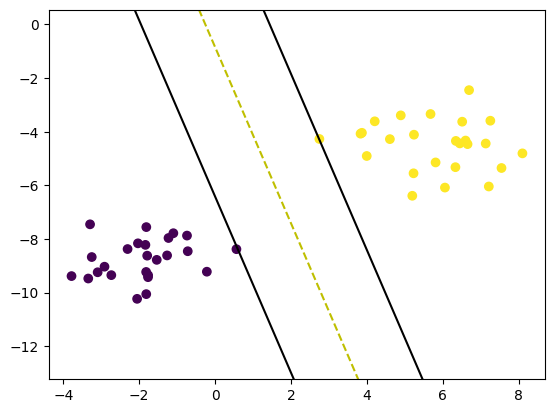

In [2]:
clf = SVM()
X,y=clf.dataloader()
clf.fit(X, y)
predictions = clf.predict(X)
print(predictions)

print(clf.w, clf.b)

clf.visualize_svm(X,y)

#### [03 Linear Regression:](#h_cell)

<a id='lr_cell'></a>
Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog).

1. ***Simple regression:*** Simple linear regression uses traditional slope-intercept form, where `m`
 and `b` are the variables our algorithm will try to “learn” to produce the most accurate predictions. `x` represents our input data and `y` represents our prediction.
 $$y=mx+b$$

2. ***Multivariable regression:*** Supposse we have three independent piece of information or independent variables x, y, z.
$$f(x,y,z)=w_1x+w_2y+w_3z$$

##### Algorithm:
1. Approximation: $\displaystyle \bar y=wx+b$
2. Lost Function: $\displaystyle MSE=J(w,b)=\frac{1}{N}\sum_{i=1}^{n}(y_i-(wx_i+b)^2)$<br>
    let, $g=(y_i-(wx_i+b))$<br>
    outer function: $\displaystyle \frac {dg^2}{dg}=2g=2(y_i-(wx_i+b))$<br>
    inner fuction: $\displaystyle \frac {d((y_i-(wx_i+b)))}{dw}=-x_i$<br>
    inner fuction: $\displaystyle \frac {d((y_i-(wx_i+b)))}{db}=-1$<br><br>
    $\displaystyle J'(w,b)=\begin{bmatrix} \frac{df}{dw} \\ \\ \frac{df}{db}\end{bmatrix}
    = \displaystyle {\begin{bmatrix} \frac{1}{N}\sum_{i=1}^{n}-2x_i\cdot (y_i-(wx_i+b)) \\ \\ \frac{1}{N}\sum_{i=1}^{n}-2\cdot (y_i-(wx_i+b))\end{bmatrix}}$
3. Update weight w and bias b.
    * $w= w-\alpha \cdot dw$
    * $b= b-\alpha \cdot db$

MSE: 305.7719958301902
Accuracy: 0.9253717934621964


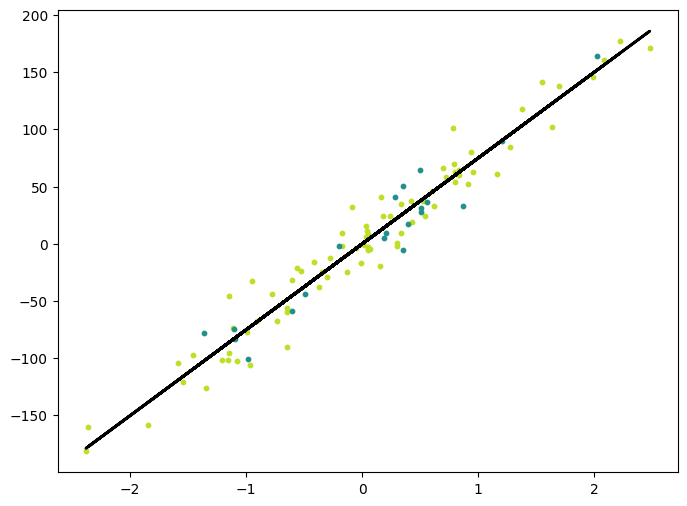

In [4]:
from linear_regression import LinearRegression

reg = LinearRegression(learning_rate=0.01, n_iters=1000)
X, X_train, X_test, y_train, y_test= reg.data_loader()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

mse = reg.mean_squared_error(y_test, predictions)
print("MSE:", mse)
accu = reg.r2_score(y_test, predictions)
print("Accuracy:", accu)

y_pred_line = reg.predict(X)
reg.plot_fig(X, X_train,y_train,X_test, y_test, y_pred_line)


#### [04 Logistic Regression:](#h_cell)

<a id='lor_cell'></a>
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.


Types of Logistic Regression:
1. Binary (Pass/Fail)
2. Multi (Cats, Dogs, Sheep)
3. Ordinal (Low, Medium, High)

In [ ]:
from logistic_regression import LogisticRegression

regressor = LogisticRegression(lr=0.0001, n_iters=1000)
X_train, X_test, y_train, y_test = regressor.dataloader()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", regressor.accuracy(y_test, predictions))

### [5 Naive Bayes Classifier:](#h_cell)
<a id ='nb_cell'></a>
Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. For example, a fruit may be considered to be an apple if it is `red, round, and about 10 cm` in diameter. A naive Bayes classifier considers each of these features to `contribute independently to the probability` that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

Bayes theroem:

$\displaystyle P(y\mid X) = \frac{P(X\mid y)P(y)}{P(X)}$ where, X, y are events and $P(X)\not = 0$
- ${\displaystyle P(y\vert X)}$ is a conditional probability: the probability of event the probability of event 
`y` occurring given that `X` is true. It is also called the ***posterior*** probability of `y` given `X`.
- ${\displaystyle P(X\vert y)}$ is also a conditional probability: the probability of event `X` occuring give that `y` is true. It can also be interpreted as the likelihood of `y` given a fixed `X` because ${\displaystyle P(X\vert y)=L(y\vert X)}$.
- P(y) and P(X) are the probabilities of observing `y` and `X` respectively without any given conditions; P(y) is known as the **prior probability** and P(X) is called **marginal probability.**


If all the features are mutually independent-
$$\displaystyle P(y\mid X) =
\frac{P(x_1\mid y)\cdot P(x_2\mid y)\cdot \cdot \cdot \cdot P(x_n\mid y)\cdot P(y)}{\displaystyle \sum_{i}^{n}P(x_n\mid y)\cdot P(y)}
=\frac{\displaystyle \prod_{i=1}^{n}p(x_i\mid y) \cdot p(y)}{\displaystyle \sum_{i}^{n}P(x_n\mid y)\cdot P(y)}$$

here, p(X) is a scaling factor and will be constaant for ${x_1, x_2, x_3}$.<br>
$\hat y=\argmax_{y}{P(y\mid X)}=\argmax_{y}{\displaystyle \prod_{i=1}^{n}p(x_i\mid y) \cdot p(y)}$ since here, all the values between 0 and 1, so the multiplication will be a small number that can raise a overflow problem.<br>
$\hat y=\argmax_{y}{P(y\mid X)}=\argmax_{y}{\displaystyle \sum_{i=1}^{n}\log(p(x_i\mid y)) + \log(p(y))}$<br>

$p(x_i\mid y, \mu, \sigma^2)=\frac {1}{\sqrt{2\pi \sigma_y^2}}e^{\displaystyle -\frac{(x_i-\mu_y)^2}{2\sigma^2}}$

Algorithm: $\hat y=\argmax_{y}{P(y\mid X)}=\argmax_{y}{\displaystyle \sum_{i=1}^{n}\log(p(x_i\mid y)) + \log(p(y))}$

1. Calculate the prior probability of given class: $p(y) = \frac {no \; of \; samples\; for\;p(y)}{total \; number\;of \; samples\; for\; all \; classes}$ 

2. calculte the $p(x_i\mid y)$

### [6 Decission Tree:](#h_cell)
<a id='dt_cell'></a>
A decision tree is a decision support hierarchical model that uses a tree-like model of decisions where each `internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents an outcome or a class label`. It is one way to display an algorithm that only contains conditional control statements. A decision tree is a powerful machine learning algorithm used for both **classification and regression tasks**.

A decision tree consists of three types of nodes:

1. Decision nodes – typically represented by squares
2. Chance nodes – typically represented by circles
3. End nodes – typically represented by triangles

Decision trees are intuitive, easy to understand, and can handle both categorical and numerical data. However, they can suffer from overfitting if the tree is too deep or if the dataset is noisy. To mitigate this, techniques like pruning and using ensemble methods like Random Forest or Gradient Boosting Trees are often employed.

Algorithm:
* Train or Build the tree
    1. Put all the dataset in the root node and split it base on the best information gain.
    2. Greedy search for all features and thresholds
    3. Save the best split feature and threshold at each node.
    4. Build the tree recursively
    5. Apply some stopping criteria to stop growing trees  ex- maximum depth, minimum samples for each node or no more class distribution in node.
    6. When we have a leaf node, store the most common class label of this node.
* Predict or Traverse:
    1. Traverse the tree recursively.
    2.

#### Entropy:
Entropy, in the context of decision trees and machine learning, is a concept used to measure the impurity or disorder of a set of data points with respect to their class labels. It is commonly used as a criterion to make decisions about how to split a dataset when constructing a decision tree.

$$Entropy\;(S)=-P_1\log_2(p_1)-P_2\log_2(p_2)-\cdot \cdot \cdot-P_n\log_2(p_n)=\displaystyle -\sum_{1}^{n}{P_n\cdot \log_2(p_n)}$$
where,
1. S is the data point
2. $p_1, p_2, ... p_n$ are the proportions of the data points
3. n is the distinct class lavel  in the dataset

Example: Consider a dataset with 100 samples that are classified into two classes: "Positive" and "Negative". Let's say there are 70 "Positive" samples and 30 "Negative" samples.<br>

$P_{+}=70/100=.7 \; and\; p_{-}=30/100$<br>
$Entropy\;(S)=−0.7log_2​(0.7)−0.3log2​(0.3)≈0.88$<br>

Informatin Gain: $IG=E(parent)-\sum [weighted \; avg]\cdot E(children)$